<a href="https://colab.research.google.com/github/rashidmeras/EVA5/blob/master/S7/EVA5_Submission_Session_7_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Objective: Take given code and meet the following targets:


>> 1. change the code such that it uses GPU
2. change the architecture to C1C2C3C40 (basically 3 MPs)
3. total RF must be more than 44
4. one of the layers must use Depthwise Separable Convolution
5. one of the layers must use Dilated Convolution
6. use GAP (compulsory):- add FC after GAP to target #of classes (optional)
7. achieve 80% accuracy, as many epochs as you want. 
8. Total Params to be less than 1M. 


Submitted By: 
* `Meras Pillai Rashid`
* `Samir Prasad`

Import `pytorch` libraries and modules:

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

Clone the repo

In [2]:
!git clone https://github.com/rashidmeras/EVA5.git

Cloning into 'EVA5'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 104 (delta 54), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 120.81 KiB | 719.00 KiB/s, done.
Resolving deltas: 100% (54/54), done.


change the code such that it uses GPU

In [3]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Device : ", device)

Device :  cuda


In [4]:
from EVA5.S7 import initialize_train_test_loader_cifar10
train_loader, test_loader = initialize_train_test_loader_cifar10.train_test_loader()

# train_loader, test_loader = train_test_loader()
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


 Initialize train and test loader with Batch Size:4


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


horse   dog   cat plane


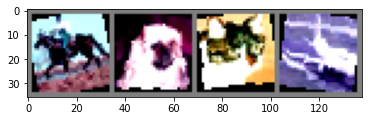

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [6]:
from EVA5.S7 import customS7Model
model = customS7Model.Net().to(device)
print("Model Loaded Successfully ")

Model Loaded Successfully 


In [7]:
!pip install torchsummary
from torchsummary import summary

# model = Net().to(device)
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
            Conv2d-4          [-1, 128, 32, 32]           1,280
              ReLU-5          [-1, 128, 32, 32]               0
       BatchNorm2d-6          [-1, 128, 32, 32]             256
         MaxPool2d-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 160, 14, 14]         184,480
              ReLU-9          [-1, 160, 14, 14]               0
      BatchNorm2d-10          [-1, 160, 14, 14]             320
        MaxPool2d-11            [-1, 160, 7, 7]               0
           Conv2d-12            [-1, 320, 9, 9]         461,120
             ReLU-13            [-1, 320, 9, 9]               0
      BatchNorm2d-14            [-1, 32

/content/EVA5/S7/customS7Model.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [16]:
from EVA5.S7 import trainingSetupCifar10

trainingSetupCifar10.initiate_training(model, device, train_loader, 25)

/content/EVA5/S7/customS7Model.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


[1,  2000] loss: 2.320
[1,  4000] loss: 2.313
[1,  6000] loss: 2.312
[1,  8000] loss: 2.311
[1, 10000] loss: 2.321
[1, 12000] loss: 2.312
[2,  2000] loss: 2.313
[2,  4000] loss: 2.316
[2,  6000] loss: 2.311
[2,  8000] loss: 2.313
[2, 10000] loss: 2.320
[2, 12000] loss: 2.325
[3,  2000] loss: 2.303
[3,  4000] loss: 2.319
[3,  6000] loss: 2.313
[3,  8000] loss: 2.317
[3, 10000] loss: 2.312
[3, 12000] loss: 2.317
[4,  2000] loss: 2.320
[4,  4000] loss: 2.316
[4,  6000] loss: 2.316
[4,  8000] loss: 2.318
[4, 10000] loss: 2.324
[4, 12000] loss: 2.318
[5,  2000] loss: 2.311
[5,  4000] loss: 2.317
[5,  6000] loss: 2.316
[5,  8000] loss: 2.323
[5, 10000] loss: 2.316
[5, 12000] loss: 2.319
[6,  2000] loss: 2.310
[6,  4000] loss: 2.313
[6,  6000] loss: 2.313
[6,  8000] loss: 2.309
[6, 10000] loss: 2.316
[6, 12000] loss: 2.324
[7,  2000] loss: 2.316
[7,  4000] loss: 2.308
[7,  6000] loss: 2.318
[7,  8000] loss: 2.318
[7, 10000] loss: 2.304
[7, 12000] loss: 2.310
[8,  2000] loss: 2.315
[8,  4000] 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GroundTruth:    cat  ship  ship plane


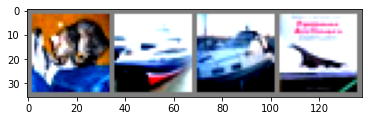

In [17]:
dataiter = iter(test_loader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [18]:
from EVA5.S7 import cifar10CheckLib
net = customS7Model.Net().to(device)

Accuracy of the network on the 10000 test images

In [21]:
cifar10CheckLib.check_test_accuracy(net, device, test_loader)

/content/EVA5/S7/customS7Model.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of the network on the 10000 test images: 9 %


Classwise evaluation

In [20]:
cifar10CheckLib.check_classwise_accuracy(net, device, test_loader, classes)

/content/EVA5/S7/customS7Model.py:49: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


Accuracy of plane :  4 %
Accuracy of   car :  1 %
Accuracy of  bird : 17 %
Accuracy of   cat : 12 %
Accuracy of  deer : 10 %
Accuracy of   dog :  1 %
Accuracy of  frog : 29 %
Accuracy of horse :  5 %
Accuracy of  ship :  8 %
Accuracy of truck :  1 %


Summary:

A model was created meeting the given targets with and trained for 25 epochs
* Total params: 926,794
* Accuracy of the network on the 10000 test images: 9 %